<a href="https://colab.research.google.com/github/yaobviously/aliens/blob/main/simplealien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4
 
import pymc3 as pm
import arviz as az
import theano as tt

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
uploaded = files.upload()

aliens = pd.read_csv('aliensightsyearcounts.csv')

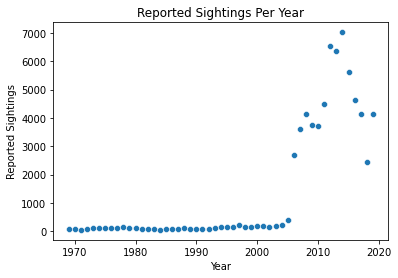

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

years = np.array(aliens['year'])
counts = np.array(aliens['sightings'])

fig, ax = plt.subplots()
sns.scatterplot(x = years, y = counts, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Reported Sightings')
plt.title('Reported Sightings Per Year')
plt.show()
plt.clf()

In [ ]:
with pm.Model() as alienmodel:

  switchYear = pm.DiscreteUniform("switchYear", lower = years.min() , upper = years.max(), testval=2003)

  early_rate = pm.Exponential("early_rate", lam = 1)
  late_rate = pm.Exponential("late_rate", lam=1)

  rate = pm.math.switch(switchYear >= years, early_rate, late_rate )

  sightings = pm.Poisson("sightings", rate, observed = counts)

  # using NUTS sampler for the continuous variables

  step1 = pm.NUTS([early_rate, late_rate])
  step2 = pm.Metropolis([switchYear])

 

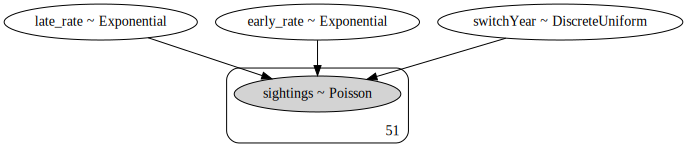

In [ ]:
pm.model_to_graphviz(alienmodel)

In [ ]:
trace = pm.sample(15000, tune = 500, step = [step1, step2])

In [ ]:
az.summary(trace)

In [ ]:
trace?
 
fig, ax = plt.subplots()
 
sns.scatterplot(x = years, y = counts, ax = ax, alpha = 0.6)
 
plt.vlines(trace['switchYear'].mean(), counts.min(), counts.max(), color = 'r')
 
ax.set_xlabel('Year')
ax.set_ylabel('Reported Sightings')